In [2]:
# Develop machine-learning model to predict AIMD-derived parameters at metal-water interfaces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

In [8]:
"""
Target: 
to predict the numbers of hydrogen bond formed
between adsorbates and waters,
a crucial indicator for stabilizing effect and H-shuttling rates
""" 

# input raw data from AIMD simulations
data_csv = 'ml_data.csv'
ml_data = pd.read_csv(data_csv)

ml_data

,adsorbate,surface,configuration,run,runtime,n_oh,n_o_not_in_ring,n_co,n_furan,Eads_CO,hbonds_aimd
0,fa,Au111,None,1,12.02,1,2,1,1,-0.35,2.06
1,fa,Au111,None,2,11.52,1,2,1,1,-0.35,1.30
2,fa,Au111,None,3,14.43,1,2,1,1,-0.35,1.30
3,fa,Cu111,None,1,13.31,1,2,1,1,-0.77,1.81
4,fa,Cu111,None,2,9.75,1,2,1,1,-0.77,1.76
...,...,...,...,...,...,...,...,...,...,...,...
61,cho,Cu211,None,1,/,0,1,1,0,-1.01,1.16
62,coh,Cu211,None,1,/,1,1,0,0,-1.01,1.77
63,occho,Cu211,None,1,/,0,2,2,0,-1.01,2.98
64,ooh,Au111,None,1,/,1,2,0,0,-0.35,3.42


In [9]:
"""
The interfaces consist of surfaces, waters and adsorbates.
To describe the three components, we choose varied features:
e.g., surface - the binding energy of CO* from static DFT calculations;
n_oh, n_co - the number of specific groups in adsorbates;
for solvent, we do not set features here, for we only have results in water
"""
ml_data['Eads_CO']

0    -0.35
1    -0.35
2    -0.35
3    -0.77
4    -0.77
      ... 
61   -1.01
62   -1.01
63   -1.01
64   -0.35
65   -1.83
Name: Eads_CO, Length: 66, dtype: float64

training data = 46
testing data = 20
The mean squared error is 0.4196069175102088


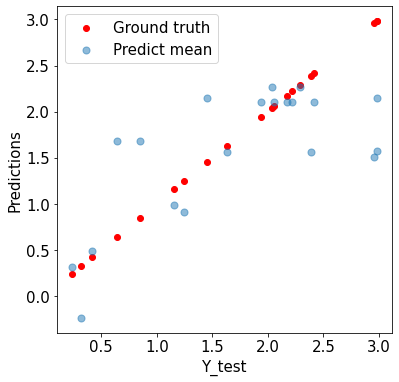

In [56]:
"""
The model training
"""

# get the initial dataset for ML from the .csv file

X = ml_data[['n_co','n_o_not_in_ring','Eads_CO']] # features/descriptors
Y = ml_data['hbonds_aimd'] # target parameter

# split data set for training, validation, and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

#X_validate, X_test, Y_validate, Y_test = train_test_split(X_test,Y_test,test_size=0.5)

print('training data = '+str(len(Y_train))+'\n'+
      'testing data = '+str(len(Y_test)))# +'\n'+
      #'validation data = '+str(len(Y_validate)))

#scaler = preprocessing.StandardScaler().fit(X_train)

# model selection
model = linear_model.BayesianRidge()
#model = linear_model.Ridge(alpha=.5)

# model training
model.fit(X_train, Y_train)
#print(model.coef_)
joblib.dump(model, 'hbonds_formation.joblib')

ymean, ystd = model.predict(X_test, return_std=True)
mse = mean_squared_error(Y_test, ymean)
print('The mean squared error is '+str(mse))
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(Y_test, Y_test, color='r', label="Ground truth")
ax.scatter(Y_test, ymean, s=50, alpha=0.5, label="Predict mean")

ax.legend(fontsize=15)
ax.set_xlabel('Y_test',fontsize=15)
ax.set_ylabel('Predictions',fontsize=15)
ax.tick_params(labelsize=15)

In [27]:
# Plotting Cross-Validated Predictions
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model_hb, X_train, Y_train, cv=4)
print(cvs)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cvs.mean(), cvs.std()))

[0.45375761 0.86264198 0.7176204  0.78338157]
0.70 accuracy with a standard deviation of 0.15


(66, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   adsorbate        66 non-null     object 
 1   surface          66 non-null     object 
 2   configuration    66 non-null     object 
 3   run              66 non-null     int64  
 4   runtime          66 non-null     object 
 5   n_oh             66 non-null     int64  
 6   n_o_not_in_ring  66 non-null     int64  
 7   n_co             66 non-null     int64  
 8   n_furan          66 non-null     int64  
 9   Eads_CO          66 non-null     float64
 10  hbonds_aimd      66 non-null     float64
dtypes: float64(2), int64(5), object(4)
memory usage: 5.8+ KB
None
[[-0.25159828 -0.63252096 -0.72384437 -0.11253833]
 [-0.87774073  0.43093936 -0.10008244  0.18397278]
 [-0.11294261  0.19150873  0.02344807 -0.97468896]
 [ 0.39180797  0.61443707 -0.68226317  0.05891161]]
0.9999999999999998

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

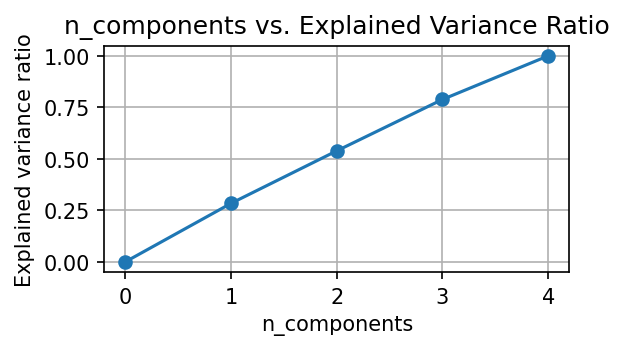

In [55]:
"""
Principal Component Analysis (PCA)
hydrogen bond formation
when unsupervised machine learning is applied
""" 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# input raw data from AIMD simulations
data_csv = 'ml_data.csv'
mldata = pd.read_csv(data_csv)
print(mldata.shape)
print(mldata.info())

# get raw data set
X = ml_data[['n_oh','n_co','n_furan','Eads_CO']]
Y = ml_data['hbonds_aimd']
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
pca = PCA(n_components=4)
pca.fit_transform(scaled_X)
print(pca.components_)
print(sum(pca.explained_variance_ratio_))
nums = np.arange(5)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scaled_X)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [36]:
"""
Estimate other adsorbates at different metal-water interfaces
e.g.,CH3COOH*@Cu111-water, COCHO*@Pt111-water
"""
model_hb = joblib.load('hbonds_formation.joblib')
predictions_hb = model_hb.predict([[2,2,-0.77],[2,3,-1.83]])
predictions_hb

array([1.84472477, 2.9547142 ])